In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import pdist, squareform
sns.set()
from sklearn import preprocessing
from scipy.special import kl_div
from scipy import stats


In [2]:
TRAINING_DATA = pd.read_csv(r'stratigraphic_geometry_dataset.csv', index_col=[0])
TRUNCATION_COLOR = "#ffffbf"
ONLAP_COLOR = "#2c7bb6"
HORIZ_COLOR = "#d7191c"

In [3]:
def flatten(container):
    "Flattens lists"
    for i in container:
        if isinstance(i, (list, tuple)):
            for j in flatten(i):
                yield j
        else:
            yield i

def feature_list(no_of_neighbors):
    """
    Creates a list of features given number of adjacent wells
    param no_of_neighbors: number of adjacent wells used in feature engineering
    """
    print("Getting the features")
    initial = ["thickness", "thickness natural log", "thickness power"]
    features = []
    for item in initial:
        features.append(item)
        for i in range(1, no_of_neighbors + 1):
            features.append(item + " neighbor " + str(i))
    features.append(["x location", "y location", "class"])
    return list(flatten(features))

In [4]:
wells_in_vicinity = 300
flat_features = feature_list(wells_in_vicinity)
subset = TRAINING_DATA[flat_features]
le = preprocessing.LabelEncoder()
le_class = le.fit_transform(subset['class'])
subset.loc[:,'le_class'] =  le_class
subset.drop('class', inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    subset.drop("le_class", axis=1), subset["le_class"], test_size=0.2, random_state=86,
)

Getting the features


In [5]:
subset = TRAINING_DATA[flat_features]
trunc = subset[subset['class'] == 'truncation']
onlap = subset[subset['class'] == 'onlap']
horiz = subset[subset['class'] == 'horizontal']

0.7945011261506744


Text(0.55, 0.55, 'KL=0.79')

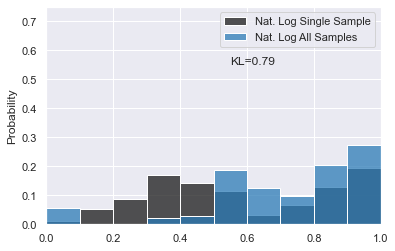

In [6]:
ft = list(stats.relfreq(onlap['thickness natural log'].values, numbins=10, defaultreallimits=(0,1))[0])
sam = stats.relfreq(onlap.iloc[3600,wells_in_vicinity+1:wells_in_vicinity+2+wells_in_vicinity].values, numbins=10, defaultreallimits=(0,1))[0]
print(sum(kl_div(sam, ft)))

g = sns.histplot(onlap.iloc[3600,wells_in_vicinity+1:wells_in_vicinity+2+wells_in_vicinity].values,label='Nat. Log Single Sample', stat='probability', binwidth=0.1, color='k',binrange=(0,1))
plt.xlim(0,1)
plt.ylim(0,0.75)

sns.histplot(onlap['thickness natural log'].values,label='Nat. Log All Samples', stat='probability', binwidth=0.1, color=ONLAP_COLOR,binrange=(0,1))
plt.xlim(0,1)
plt.ylim(0,0.75)
plt.legend()
g.text(0.55, 0.55, f'KL={sum(kl_div(sam, ft)).round(2)}')
# plt.savefig('onlap_KL.pdf')

0.24995976560148092


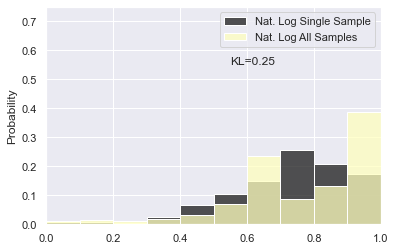

In [7]:
ft = list(stats.relfreq(trunc['thickness natural log'].values, numbins=10, defaultreallimits=(0,1))[0])
sam = stats.relfreq(trunc.iloc[3600,wells_in_vicinity+1:wells_in_vicinity+2+wells_in_vicinity].values, numbins=10, defaultreallimits=(0,1))[0]
print(sum(kl_div(sam, ft)))

g = sns.histplot(trunc.iloc[3600,wells_in_vicinity+1:wells_in_vicinity+2+wells_in_vicinity].values,label='Nat. Log Single Sample', stat='probability', binwidth=0.1, color='k',binrange=(0,1))
plt.xlim(0,1)
plt.ylim(0,0.75)
sns.histplot(trunc['thickness natural log'].values,label='Nat. Log All Samples', stat='probability', binwidth=0.1, color=TRUNCATION_COLOR,binrange=(0,1))
plt.xlim(0,1)
plt.ylim(0,0.75)
plt.legend()
g.text(0.55, 0.55, f'KL={sum(kl_div(sam, ft)).round(2)}')
# plt.savefig('trunc_KL.pdf')

0.3789946004927489


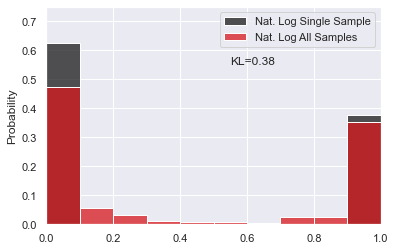

In [8]:
ft = list(stats.relfreq(horiz['thickness natural log'].values, numbins=10, defaultreallimits=(0,1))[0])
sam = stats.relfreq(horiz.iloc[3600,wells_in_vicinity+1:wells_in_vicinity+2+wells_in_vicinity].values, numbins=10, defaultreallimits=(0,1))[0]
print(sum(kl_div(sam, ft)))

g = sns.histplot(horiz.iloc[9599,wells_in_vicinity+1:wells_in_vicinity+2+wells_in_vicinity].values,label='Nat. Log Single Sample', stat='probability', binwidth=0.1, color='k',binrange=(0,1))
plt.xlim(0,1)
plt.ylim(0,0.75)

sns.histplot(horiz['thickness natural log'].values,label='Nat. Log All Samples', stat='probability', binwidth=0.1, color=HORIZ_COLOR,binrange=(0,1))
plt.xlim(0,1)
plt.ylim(0,0.75)
plt.legend()
g.text(0.55, 0.55, f'KL={sum(kl_div(sam, ft)).round(2)}')
# plt.savefig('horiz_KL.pdf')

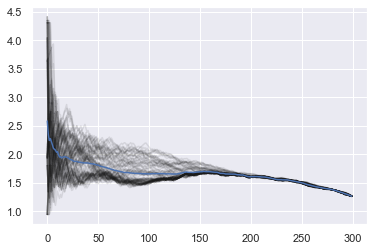

In [9]:
kldiv = []
fullkdv = []
ft = list(stats.relfreq(trunc['thickness natural log'].values, numbins=10, defaultreallimits=(0,1))[0])
for i in range(wells_in_vicinity):
    kldiv = []
    for sample in range(100):
        sam = stats.relfreq(trunc.iloc[sample,wells_in_vicinity+1:wells_in_vicinity+3+i].values, numbins=10, defaultreallimits=(0,1))[0]
        kldiv.append(sum(kl_div(sam, ft)))
    fullkdv.append(kldiv)

plt.plot(fullkdv, c='k', alpha=0.1)
plt.plot(np.mean(fullkdv, axis=1))

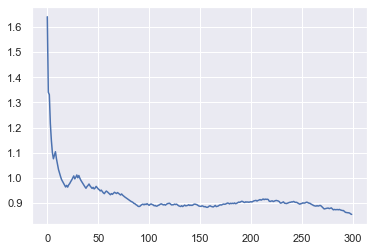

In [10]:
kldiv = []
fullkdv = []
ft = list(stats.relfreq(onlap['thickness natural log'].values, numbins=10, defaultreallimits=(0,1))[0])
for i in range(wells_in_vicinity):
    kldiv = []
    for sample in range(500):
        sam = stats.relfreq(onlap.iloc[sample,wells_in_vicinity+1:wells_in_vicinity+3+i].values, numbins=10, defaultreallimits=(0,1))[0]
        kldiv.append(sum(kl_div(sam, ft)))
    fullkdv.append(kldiv)

#plt.plot(fullkdv, c='k', alpha=0.1)
plt.plot(np.mean(fullkdv, axis=1))

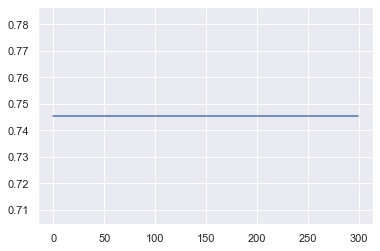

In [11]:
kldiv = []
fullkdv = []
ft = list(stats.relfreq(horiz['thickness natural log'].values, numbins=10, defaultreallimits=(0,1))[0])
for i in range(wells_in_vicinity):
    kldiv = []
    for sample in range(500):
        sam = stats.relfreq(horiz.iloc[sample,wells_in_vicinity+1:wells_in_vicinity+3+i].values, numbins=10, defaultreallimits=(0,1))[0]
        kldiv.append(sum(kl_div(sam, ft)))
    fullkdv.append(kldiv)

#plt.plot(fullkdv, c='k', alpha=0.1)
plt.plot(np.mean(fullkdv, axis=1))

In [12]:
TRAINING_DATA

,thickness,thickness neighbor 1,thickness neighbor 2,thickness neighbor 3,thickness neighbor 4,thickness neighbor 5,thickness neighbor 6,thickness neighbor 7,thickness neighbor 8,thickness neighbor 9,...,thickness power neighbor 393,thickness power neighbor 394,thickness power neighbor 395,thickness power neighbor 396,thickness power neighbor 397,thickness power neighbor 398,thickness power neighbor 399,x location,y location,class
0,0.989164,0.997804,0.145011,0.140579,0.989637,0.997083,0.151415,0.984158,0.132947,0.996989,...,0.469745,0.001928,0.002412,0.002352,4.957906e-04,1.000000,0.000000,0.025438,0.804583,truncation
1,0.993069,0.158518,0.997046,0.125418,0.099472,0.997083,0.151415,0.984158,0.997798,0.135135,...,0.469745,0.002412,0.001928,0.002352,4.957906e-04,1.000000,0.000000,0.000000,1.000000,truncation
2,0.997804,0.996779,0.996813,0.989164,0.148022,0.984689,0.135106,0.144972,0.118781,0.125444,...,0.469745,0.001928,0.002412,0.002352,4.957906e-04,1.000000,0.000000,0.023262,0.850931,truncation
3,0.987700,0.989470,0.982919,0.140579,0.141552,0.981977,0.982368,0.989164,0.141371,0.147452,...,0.001928,0.469745,0.002352,0.002412,4.957906e-04,0.005819,0.352576,0.046525,0.701862,truncation
4,0.158518,0.993069,0.997046,0.103070,0.121915,0.997083,0.151415,0.984158,0.132947,0.998014,...,0.469745,0.002412,0.001928,0.002352,4.957906e-04,1.000000,0.000000,0.007172,0.995704,truncation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.997179,0.007979,0.020138,0.980274,0.014722,0.007811,0.018580,0.000000,0.006924,0.997418,...,1.000000,0.000000,1.000000,0.920626,1.193071e-09,1.000000,1.000000,0.881213,0.119613,horizontal
396,0.018147,0.017227,0.992565,0.005678,0.007398,0.998817,0.002361,0.005841,0.998247,0.006277,...,1.000000,0.000000,1.000000,0.920626,1.193071e-09,1.000000,1.000000,0.993374,0.006618,horizontal
397,0.017227,0.018147,0.005678,0.992544,0.007398,0.998817,0.002361,0.005841,0.998247,0.006277,...,1.000000,0.000000,1.000000,0.920626,1.193071e-09,1.000000,1.000000,0.995582,0.004412,horizontal
398,0.995570,0.018549,0.999137,0.006876,0.980883,0.017290,0.996625,0.987936,0.015123,0.980400,...,1.000000,0.000000,1.000000,0.920626,1.193071e-09,1.000000,1.000000,0.843858,0.157310,horizontal
